In [1]:
import geopandas as gpd
from pysal.lib import weights
import pysal

/opt/anaconda3/lib/python3.9/site-packages/geopandas/_compat.py:112: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(


In [2]:
areas = gpd.read_file('nj_sit__administrative.geojson')

In [3]:
areas_27 = areas.iloc[27:27 + 27].reset_index()

In [4]:
areas_27['emertimi'] = areas_27['emertimi'].str.replace('Njesia Administrative', 'Nja').str.replace(' 0', '').str.replace(' 1', '1').str.title()

In [5]:
areas_27 = areas_27.drop([6, 7, 8])

In [6]:
import pandas as pd
import seaborn as sns
from scipy.stats import powerlaw
import giddy
from giddy.markov import Spatial_Markov
from giddy.markov import Markov
import contextily as cx
from esda.moran import Moran
import locale
import numpy as np
import matplotlib.pyplot as plt

OMP: Info #271: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


In [7]:
# getting the data to work

In [8]:
population = pd.read_csv('Demografia - Demografia.csv.csv')

In [9]:
population = population.merge(areas_27, left_on = 'Njesia Administrative', right_on = 'emertimi', how = 'inner')

In [10]:
population

,Njesia Administrative,2009,2010,2011,2012,2013,2014,2015,2016,2017,...,2021,index,id,emertimi,nr_njesie,njesia_adm,name,_umap_options,description,geometry
0,Nja Baldushk,5271,5243,5323,5356,5369,5367,5356,5371,5329,...,5342,27,11,Nja Baldushk,19,NJA BALDUSHK,Baldushku,{'outlink': 'https://opendata.tirana.al/?q=bal...,None,"POLYGON Z ((19.78872 41.25826 0.00000, 19.7893..."
1,Nja Berzhite,5681,5753,5812,5802,5835,5855,5861,5906,5891,...,5936,28,12,Nja Berzhite,20,NJA BERZHITE,Bërzhita,{'outlink': 'https://opendata.tirana.al/?q=bër...,None,"POLYGON Z ((20.01048 41.29406 0.00000, 20.0104..."
2,Nja Dajt,1147,1194,12364,1299,13834,14424,15195,16026,21218,...,28315,29,21,Nja Dajt,12,NJA DAJT,Dajti,{'outlink': 'https://opendata.tirana.al/?q=daj...,None,"POLYGON Z ((19.89645 41.38585 0.00000, 19.8984..."
3,Nja Farke,11206,11622,119,12148,12469,12865,13259,13768,17894,...,26019,30,19,Nja Farke,13,NJA FARKE,Farka,{'outlink': 'https://opendata.tirana.al/?q=far...,None,"POLYGON Z ((19.87214 41.33105 0.00000, 19.8723..."
4,Nja Kashar,20829,21524,22146,22933,23587,24306,25034,26304,37373,...,58664,31,6,Nja Kashar,15,NJA KASHAR,Kashari,{'outlink': 'https://opendata.tirana.al/?q=kas...,None,"POLYGON Z ((19.76789 41.32240 0.00000, 19.7669..."
5,Nja Krrabe,2999,3064,3094,3108,3106,3118,3098,31,3062,...,3028,32,22,Nja Krrabe,21,NJA KRRABE,Krraba,{'outlink': 'https://opendata.tirana.al/?q=krr...,None,"POLYGON Z ((19.99335 41.23517 0.00000, 19.9943..."
6,Nja Ndroq,9133,9124,9191,9209,9184,9224,921,9269,9356,...,9642,36,24,Nja Ndroq,16,NJA NDROQ,Ndroqi,{'outlink': 'https://opendata.tirana.al/?q=ndr...,None,"POLYGON Z ((19.65245 41.32997 0.00000, 19.6525..."
7,Nja Petrele,6384,6402,6451,6464,6528,6569,6577,6615,6587,...,6883,48,14,Nja Petrele,18,NJA PETRELE,Petrela,{'outlink': 'https://opendata.tirana.al/?q=pet...,None,"POLYGON Z ((19.94995 41.29729 0.00000, 19.9495..."
8,Nja Peze,5557,5649,5717,5781,5792,5819,5823,5832,5855,...,6301,49,15,Nja Peze,17,NJA PEZE,Peza,{'outlink': 'https://opendata.tirana.al/?q=pez...,None,"POLYGON Z ((19.72176 41.29414 0.00000, 19.7223..."
9,Nja Shengjergj,2825,277,28,2804,279,2768,2728,2736,2594,...,2502,50,16,Nja Shengjergj,22,NJA SHENGJERGJ,Shëngjergji,{'outlink': 'https://opendata.tirana.al/?q=shë...,None,"POLYGON Z ((20.09412 41.40479 0.00000, 20.0955..."


In [11]:
for i in population.iloc[:, 1:14].columns:
    population[i] = population[i].astype(int)

In [12]:
population

,Njesia Administrative,2009,2010,2011,2012,2013,2014,2015,2016,2017,...,2021,index,id,emertimi,nr_njesie,njesia_adm,name,_umap_options,description,geometry
0,Nja Baldushk,5271,5243,5323,5356,5369,5367,5356,5371,5329,...,5342,27,11,Nja Baldushk,19,NJA BALDUSHK,Baldushku,{'outlink': 'https://opendata.tirana.al/?q=bal...,None,"POLYGON Z ((19.78872 41.25826 0.00000, 19.7893..."
1,Nja Berzhite,5681,5753,5812,5802,5835,5855,5861,5906,5891,...,5936,28,12,Nja Berzhite,20,NJA BERZHITE,Bërzhita,{'outlink': 'https://opendata.tirana.al/?q=bër...,None,"POLYGON Z ((20.01048 41.29406 0.00000, 20.0104..."
2,Nja Dajt,1147,1194,12364,1299,13834,14424,15195,16026,21218,...,28315,29,21,Nja Dajt,12,NJA DAJT,Dajti,{'outlink': 'https://opendata.tirana.al/?q=daj...,None,"POLYGON Z ((19.89645 41.38585 0.00000, 19.8984..."
3,Nja Farke,11206,11622,119,12148,12469,12865,13259,13768,17894,...,26019,30,19,Nja Farke,13,NJA FARKE,Farka,{'outlink': 'https://opendata.tirana.al/?q=far...,None,"POLYGON Z ((19.87214 41.33105 0.00000, 19.8723..."
4,Nja Kashar,20829,21524,22146,22933,23587,24306,25034,26304,37373,...,58664,31,6,Nja Kashar,15,NJA KASHAR,Kashari,{'outlink': 'https://opendata.tirana.al/?q=kas...,None,"POLYGON Z ((19.76789 41.32240 0.00000, 19.7669..."
5,Nja Krrabe,2999,3064,3094,3108,3106,3118,3098,31,3062,...,3028,32,22,Nja Krrabe,21,NJA KRRABE,Krraba,{'outlink': 'https://opendata.tirana.al/?q=krr...,None,"POLYGON Z ((19.99335 41.23517 0.00000, 19.9943..."
6,Nja Ndroq,9133,9124,9191,9209,9184,9224,921,9269,9356,...,9642,36,24,Nja Ndroq,16,NJA NDROQ,Ndroqi,{'outlink': 'https://opendata.tirana.al/?q=ndr...,None,"POLYGON Z ((19.65245 41.32997 0.00000, 19.6525..."
7,Nja Petrele,6384,6402,6451,6464,6528,6569,6577,6615,6587,...,6883,48,14,Nja Petrele,18,NJA PETRELE,Petrela,{'outlink': 'https://opendata.tirana.al/?q=pet...,None,"POLYGON Z ((19.94995 41.29729 0.00000, 19.9495..."
8,Nja Peze,5557,5649,5717,5781,5792,5819,5823,5832,5855,...,6301,49,15,Nja Peze,17,NJA PEZE,Peza,{'outlink': 'https://opendata.tirana.al/?q=pez...,None,"POLYGON Z ((19.72176 41.29414 0.00000, 19.7223..."
9,Nja Shengjergj,2825,277,28,2804,279,2768,2728,2736,2594,...,2502,50,16,Nja Shengjergj,22,NJA SHENGJERGJ,Shëngjergji,{'outlink': 'https://opendata.tirana.al/?q=shë...,None,"POLYGON Z ((20.09412 41.40479 0.00000, 20.0955..."


In [13]:
population = gpd.GeoDataFrame(population, geometry = 'geometry')

In [14]:
# power law demo

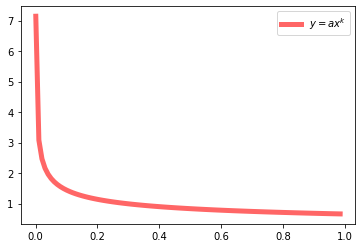

In [15]:
fig, ax = plt.subplots(1, 1)
x = np.linspace(powerlaw.ppf(0.01, 0.659),
                powerlaw.ppf(0.99, 0.659), 100)
ax.plot(x, powerlaw.pdf(x, 0.659),
        'r-', lw=5, alpha=0.6, label='$ y = ax^k $');

ax.legend();

### Power Law (over the years): 2009, 2015, 2021

In [16]:
arr = np.array([i for i in range(len(population.iloc[1:]))])/24

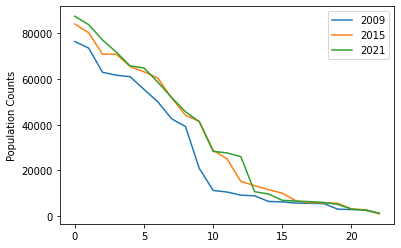

In [17]:
sns.lineplot(y = population['2009'].iloc[1:].sort_values(ascending = False), x = range(len(population.iloc[1:])), label = '2009');
sns.lineplot(y = population['2015'].iloc[1:].sort_values(ascending = False), x = range(len(population.iloc[1:])), label = '2015');
sns.lineplot(y = population['2021'].iloc[1:].sort_values(ascending = False), x = range(len(population.iloc[1:])), label = '2021');
plt.ylabel('Population Counts');

In [18]:
# explanations

In [19]:
# a bit more exploring: go into the highest change, lowest, average change?

In [20]:
population['change'] = population['2021'] - population['2009']

In [21]:
population[(population['2021'] - population['2009']) == 37835] # Kashar

,Njesia Administrative,2009,2010,2011,2012,2013,2014,2015,2016,2017,...,index,id,emertimi,nr_njesie,njesia_adm,name,_umap_options,description,geometry,change
4,Nja Kashar,20829,21524,22146,22933,23587,24306,25034,26304,37373,...,31,6,Nja Kashar,15,NJA KASHAR,Kashari,{'outlink': 'https://opendata.tirana.al/?q=kas...,None,"POLYGON Z ((19.76789 41.32240 0.00000, 19.7669...",37835


In [22]:
population[(population['2021'] - population['2009']) == -9252] # Zall Herr

,Njesia Administrative,2009,2010,2011,2012,2013,2014,2015,2016,2017,...,index,id,emertimi,nr_njesie,njesia_adm,name,_umap_options,description,geometry,change
12,Nja Zall Herr,10515,10647,10762,10843,11007,1145,11548,11725,11973,...,53,18,Nja Zall Herr,24,NJA ZALL HERR,Zall Herr,{'outlink': 'https://opendata.tirana.al/?q=zal...,None,"POLYGON Z ((19.86448 41.44586 0.00000, 19.8648...",-9252


In [23]:
population_fil = population[(population['change'] < 50000) & (population['change'] > -30000)]

In [24]:
# hypothesis: has the suburb experienced more urban growth?

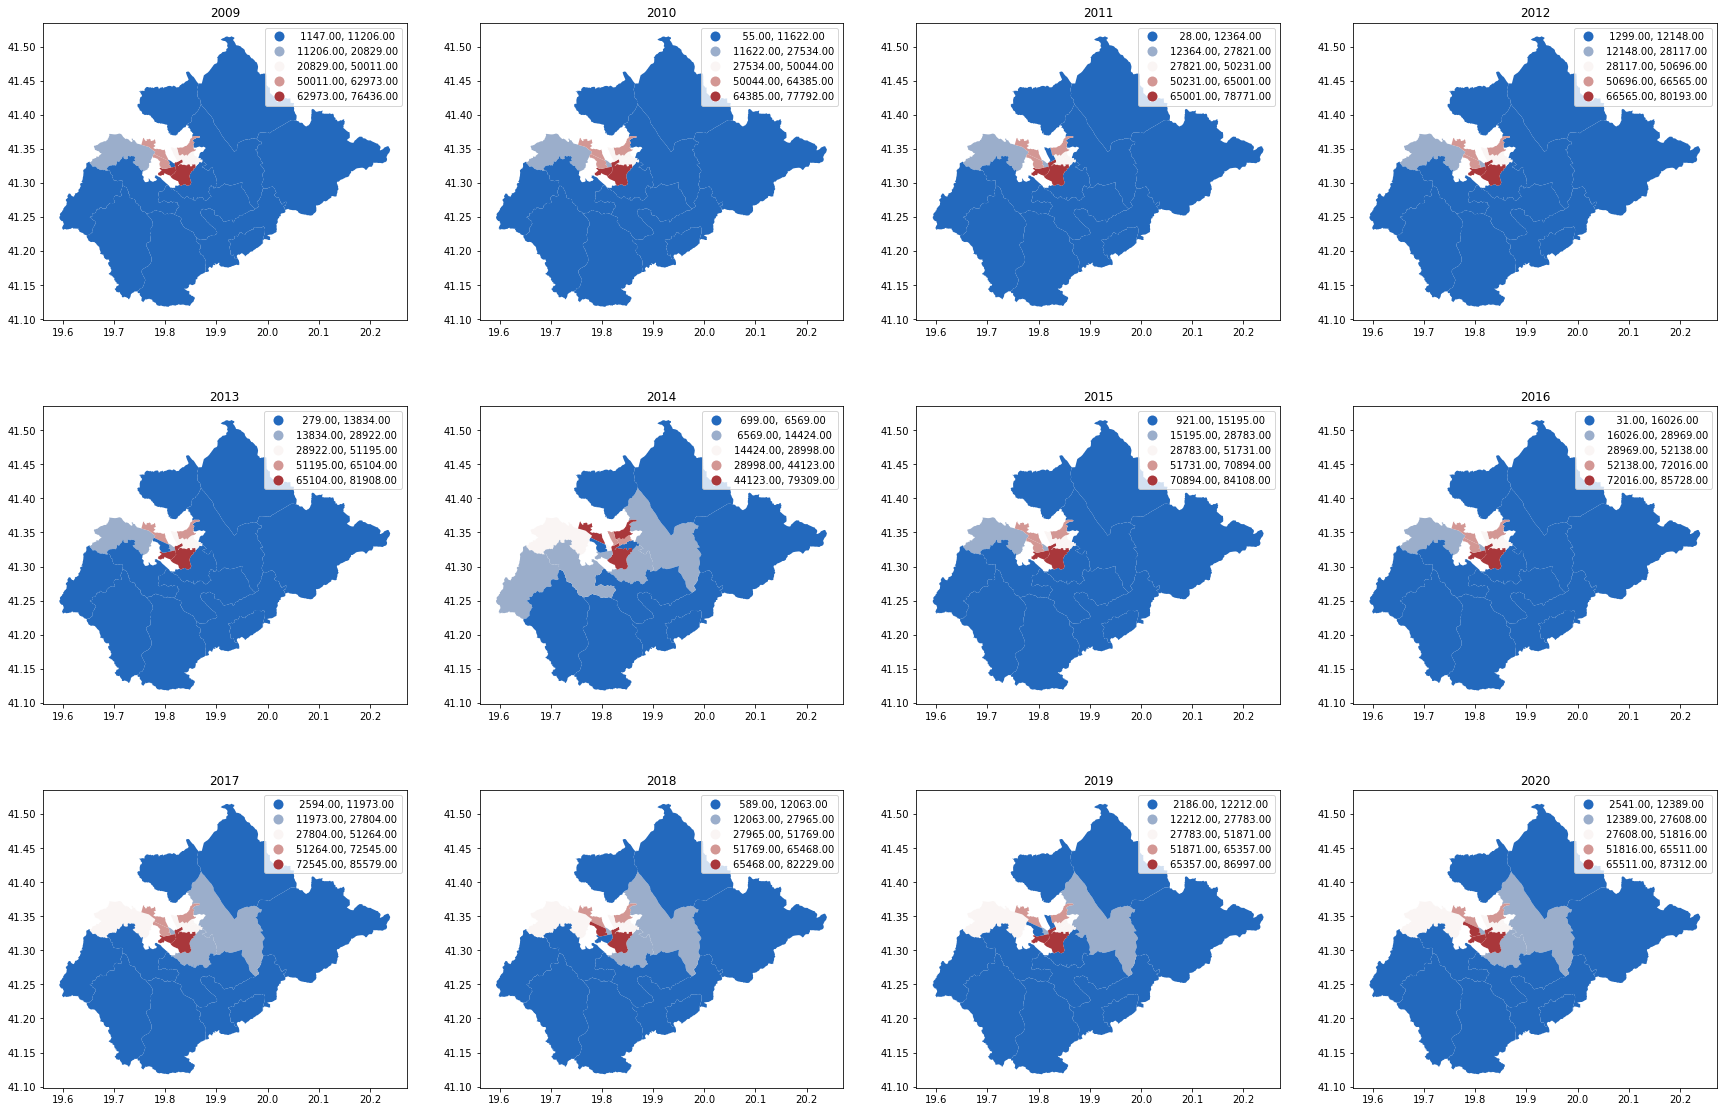

In [25]:
population_fil

fig, ax = plt.subplots(3, 4, figsize=(30,20))

population_fil.plot(ax=ax[0][0], column='2009', cmap = "vlag", legend = True, scheme = 'FisherJenks');
population_fil.plot(ax=ax[0][1], column='2010', cmap = "vlag", legend = True, scheme = 'FisherJenks');
population_fil.plot(ax=ax[0][2], column='2011', cmap = "vlag", legend = True, scheme = 'FisherJenks');
population_fil.plot(ax=ax[0][3], column='2012', cmap = "vlag", legend = True, scheme = 'FisherJenks');
population_fil.plot(ax=ax[1][0], column='2013', cmap = "vlag", legend = True, scheme = 'FisherJenks');
population_fil.plot(ax=ax[1][1], column='2014', cmap = "vlag", legend = True, scheme = 'FisherJenks');
population_fil.plot(ax=ax[1][2], column='2015', cmap = "vlag", legend = True, scheme = 'FisherJenks');
population_fil.plot(ax=ax[1][3], column='2016', cmap = "vlag", legend = True, scheme = 'FisherJenks');
population_fil.plot(ax=ax[2][0], column='2017', cmap = "vlag", legend = True, scheme = 'FisherJenks');
population_fil.plot(ax=ax[2][1], column='2018', cmap = "vlag", legend = True, scheme = 'FisherJenks');
population_fil.plot(ax=ax[2][2],  column='2019', cmap = "vlag", legend = True, scheme = 'FisherJenks');
population_fil.plot(ax=ax[2][3], column='2020', cmap = "vlag", legend = True, scheme = 'FisherJenks');
ax[0][0].set_title('2009');
ax[0][1].set_title('2010');
ax[0][2].set_title('2011');
ax[0][3].set_title('2012');
ax[1][0].set_title('2013');
ax[1][1].set_title('2014');
ax[1][2].set_title('2015');
ax[1][3].set_title('2016');
ax[2][0].set_title('2017');
ax[2][1].set_title('2018');
ax[2][2].set_title('2019');
ax[2][3].set_title('2020');

In [26]:
# specifics: Kashar, Dajt, Farke

In [27]:
urban = population.iloc[14:, :]

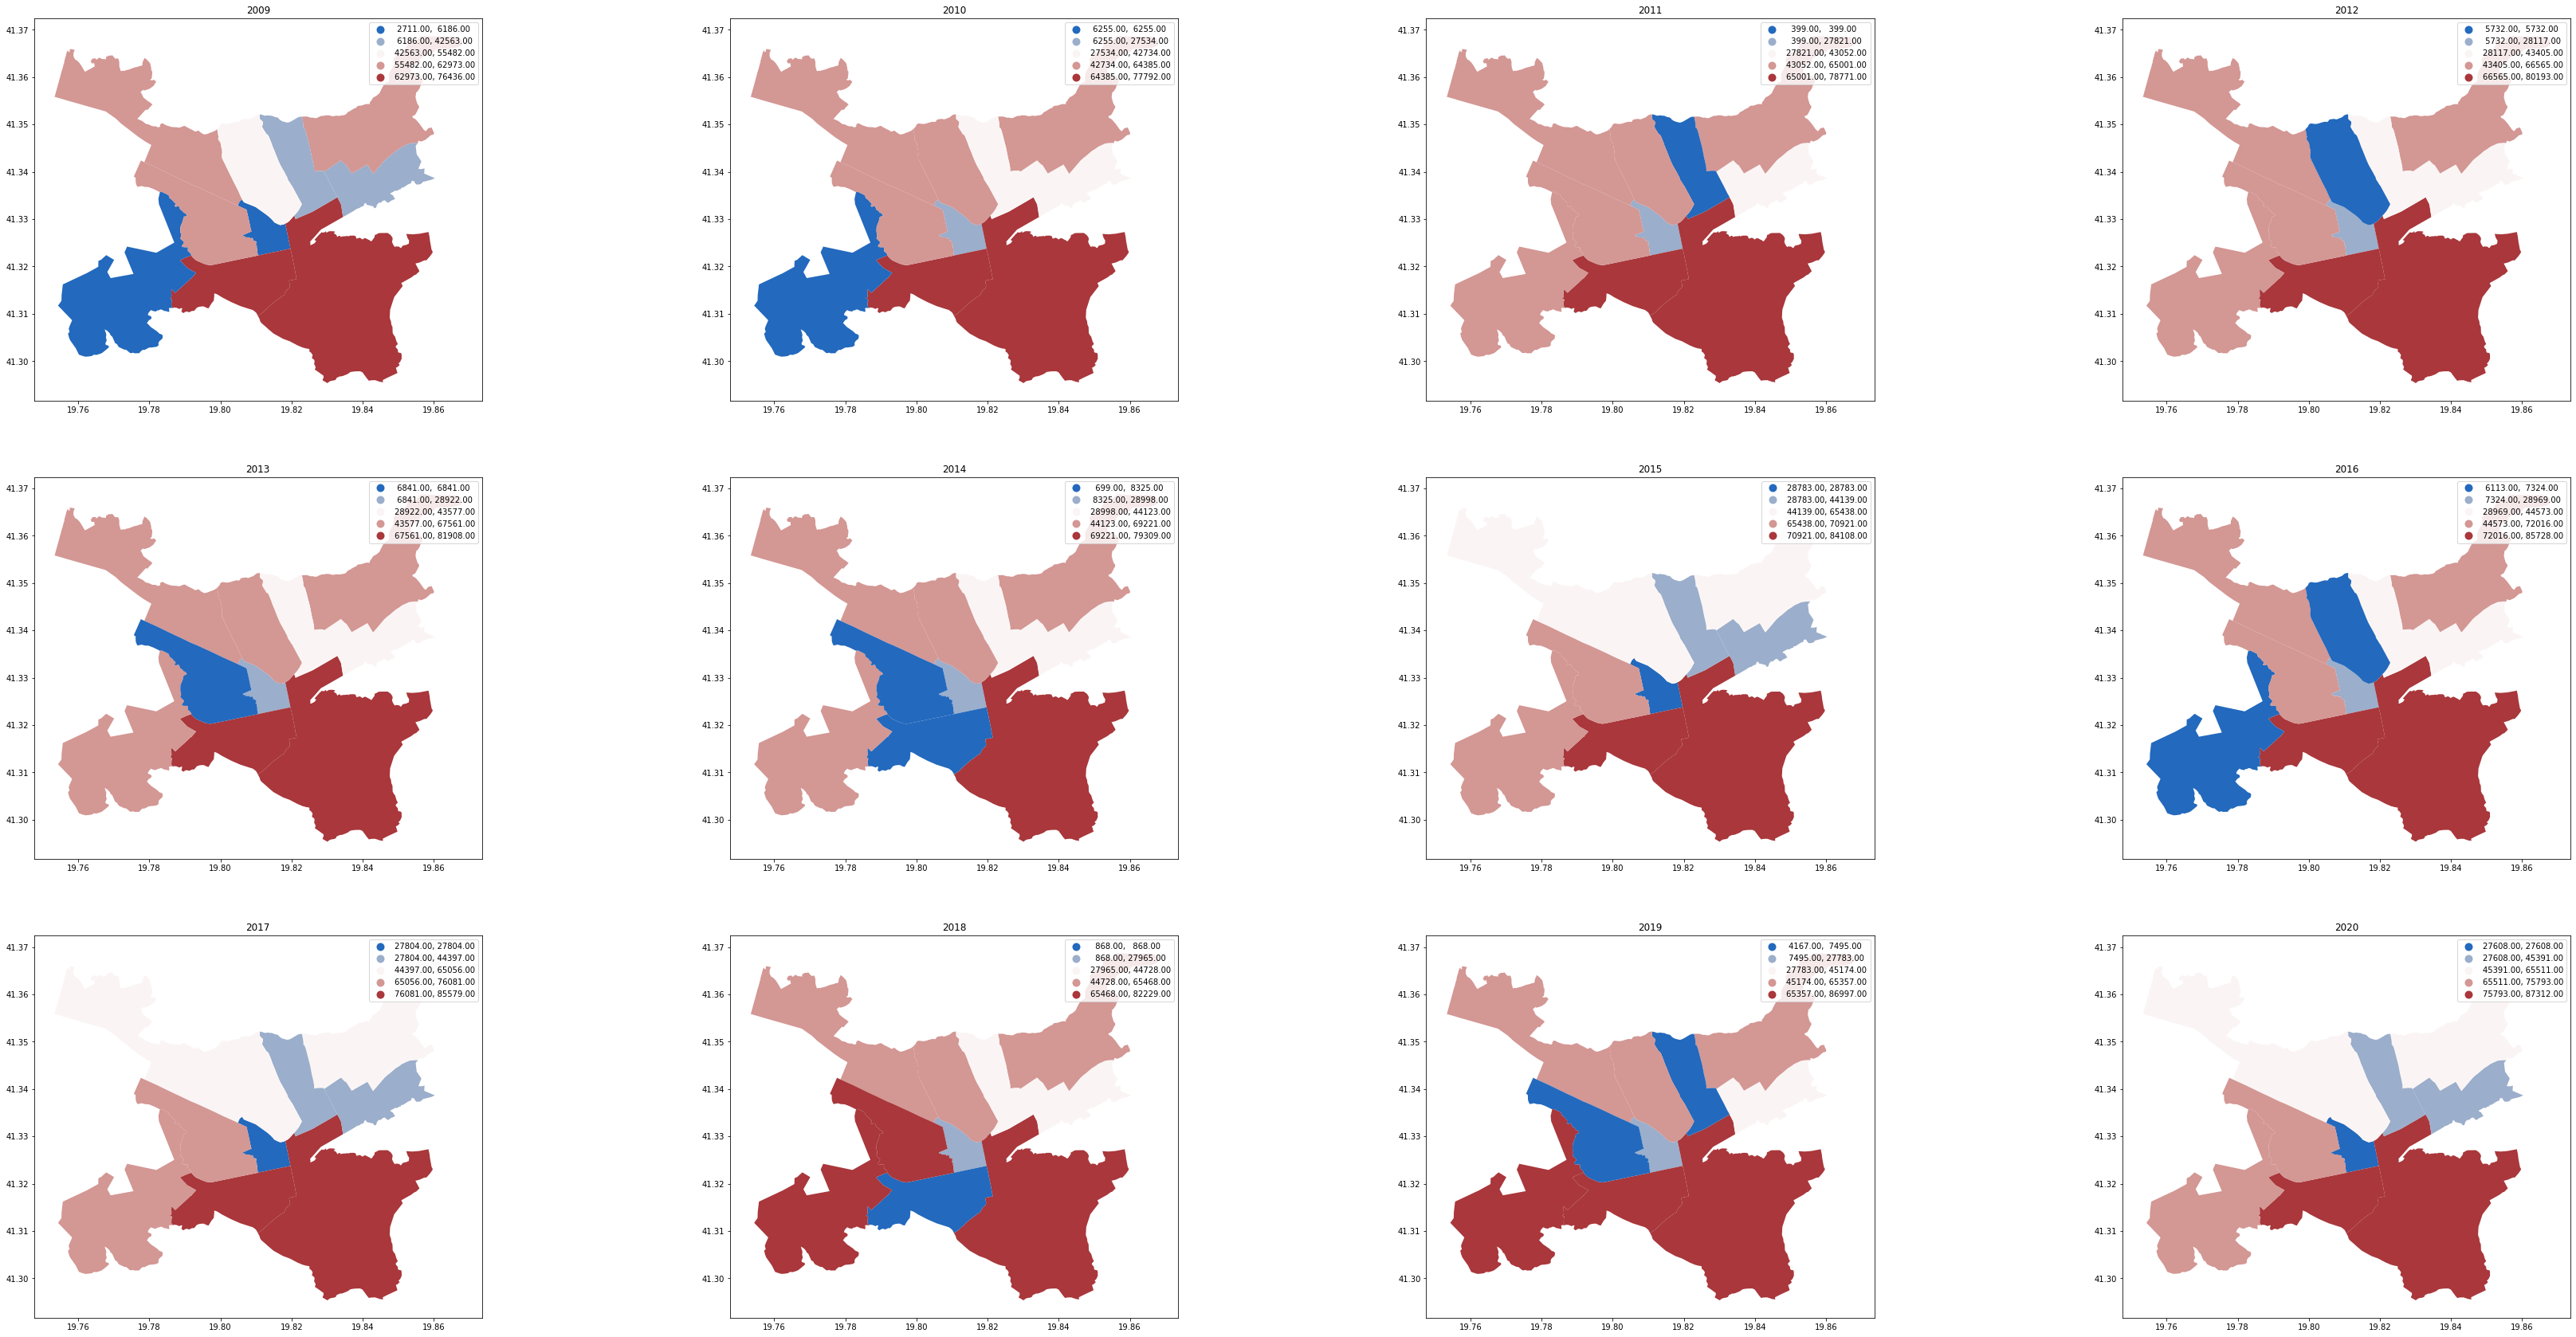

In [28]:
fig, ax = plt.subplots(3, 4, figsize=(60,30))

urban.plot(ax=ax[0][0], column='2009', cmap = "vlag", legend = True, scheme = 'FisherJenks');
urban.plot(ax=ax[0][1], column='2010', cmap = "vlag", legend = True, scheme = 'FisherJenks');
urban.plot(ax=ax[0][2], column='2011', cmap = "vlag", legend = True, scheme = 'FisherJenks');
urban.plot(ax=ax[0][3], column='2012', cmap = "vlag", legend = True, scheme = 'FisherJenks');
urban.plot(ax=ax[1][0], column='2013', cmap = "vlag", legend = True, scheme = 'FisherJenks');
urban.plot(ax=ax[1][1], column='2014', cmap = "vlag", legend = True, scheme = 'FisherJenks');
urban.plot(ax=ax[1][2], column='2015', cmap = "vlag", legend = True, scheme = 'FisherJenks');
urban.plot(ax=ax[1][3], column='2016', cmap = "vlag", legend = True, scheme = 'FisherJenks');
urban.plot(ax=ax[2][0], column='2017', cmap = "vlag", legend = True, scheme = 'FisherJenks');
urban.plot(ax=ax[2][1], column='2018', cmap = "vlag", legend = True, scheme = 'FisherJenks');
urban.plot(ax=ax[2][2],  column='2019', cmap = "vlag", legend = True, scheme = 'FisherJenks');
urban.plot(ax=ax[2][3], column='2020', cmap = "vlag", legend = True, scheme = 'FisherJenks');
ax[0][0].set_title('2009');
ax[0][1].set_title('2010');
ax[0][2].set_title('2011');
ax[0][3].set_title('2012');
ax[1][0].set_title('2013');
ax[1][1].set_title('2014');
ax[1][2].set_title('2015');
ax[1][3].set_title('2016');
ax[2][0].set_title('2017');
ax[2][1].set_title('2018');
ax[2][2].set_title('2019');
ax[2][3].set_title('2020');

### Moran

### Spatial 

In [29]:
l_col = list(np.array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]))

l_col.append(22)

In [30]:
w_queen = weights.contiguity.Queen.from_dataframe(population_fil.iloc[:, l_col])

In [31]:
w_queen.sparse.toarray().shape

(22, 22)

In [32]:
w_queen.transform = 'r'

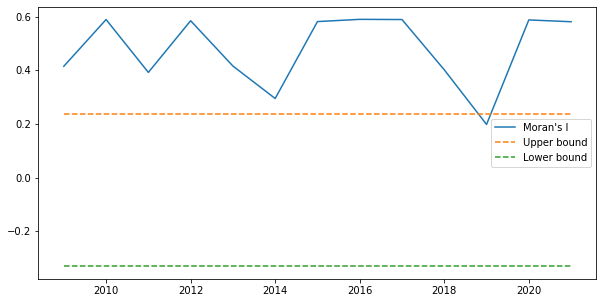

In [33]:
mits = [Moran(population_fil.iloc[:, l_col][cs], w_queen) for cs in population_fil.dropna().iloc[:, 1:14]]
res = np.array([(mi.I, mi.EI, mi.seI_norm, mi.sim[974]) for mi in mits])
years = np.arange(2009,2022)
fig, ax = plt.subplots(nrows=1, ncols=1,figsize = (10,5) )
ax.plot(years, res[:,0], label='Moran\'s I');
ax.plot(years, res[:,1]+1.96*res[:,2], label='Upper bound',linestyle='dashed');
ax.plot(years, res[:,1]-1.96*res[:,2], label='Lower bound',linestyle='dashed');
ax.legend();

In [34]:
m = Spatial_Markov(population_fil.iloc[:, 1:14].to_numpy(), w_queen, fixed=True, variable_name='rpci')

In [35]:
m.cutoffs

array([ 5690.  , 12018.  , 50184.25])

Global: the chance that areas at each cutoff will remain in that cutoff:

- for the first bin: about 72 percent, 77 percent, 90 percent and 91 percent
- moving to the next bin: 4th to 3rd: about 17 percent, 2nd to 1st: about 15 percent

In [36]:
m.p

array([[0.74626866, 0.10447761, 0.10447761, 0.04477612],
       [0.10606061, 0.84848485, 0.01515152, 0.03030303],
       [0.07575758, 0.        , 0.89393939, 0.03030303],
       [0.03076923, 0.04615385, 0.        , 0.92307692]])

In [37]:
for p in m.P:
    print(p)
    
m.P.shape

[[0.925      0.075      0.         0.        ]
 [0.10344828 0.89655172 0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]]
[[0.68421053 0.21052632 0.10526316 0.        ]
 [0.06666667 0.9        0.03333333 0.        ]
 [0.16666667 0.         0.83333333 0.        ]
 [0.         0.         0.         1.        ]]
[[0.         0.         0.5        0.5       ]
 [0.2        0.6        0.         0.2       ]
 [0.04545455 0.         0.86363636 0.09090909]
 [0.02702703 0.05405405 0.         0.91891892]]
[[0.     0.     0.75   0.25  ]
 [0.5    0.     0.     0.5   ]
 [0.0625 0.     0.9375 0.    ]
 [0.04   0.04   0.     0.92  ]]


(4, 4, 4)

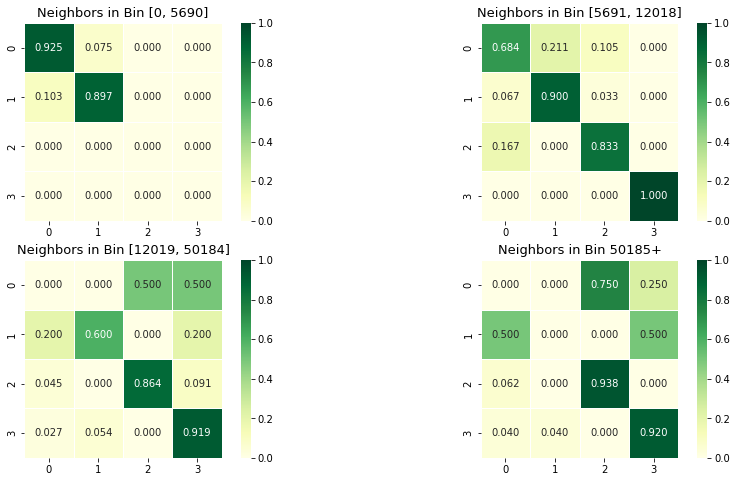

In [38]:
fig, axes = plt.subplots(2,2,figsize = (15,8))

p_temp = m.P[0]
im = sns.heatmap(p_temp, annot=True, linewidths=.5, ax=axes[0][0], cbar=True, vmin=0, vmax=1,
                          square=True, cmap="YlGn",fmt='.3f')
axes[0][0].set_title("Neighbors in Bin [0, 5690]",fontsize=13);

p_temp = m.P[1]
im = sns.heatmap(p_temp, annot=True, linewidths=.5, ax=axes[0][1], cbar=True, vmin=0, vmax=1,
                          square=True, cmap="YlGn",fmt='.3f')
axes[0][1].set_title("Neighbors in Bin [5691, 12018]",fontsize=13);

p_temp = m.P[2]
im = sns.heatmap(p_temp, annot=True, linewidths=.5, ax=axes[1][0], cbar=True, vmin=0, vmax=1,
                          square=True, cmap="YlGn",fmt='.3f')
axes[1][0].set_title("Neighbors in Bin [12019, 50184]",fontsize=13);

p_temp = m.P[3]
im = sns.heatmap(p_temp, annot=True, linewidths=.5, ax=axes[1][1], cbar=True, vmin=0, vmax=1,
                          square=True, cmap="YlGn",fmt='.3f')
axes[1][1].set_title("Neighbors in Bin 50185+",fontsize=13);



## Delving Deeper in the Markov Model

In [39]:
# here are the most populated areas as of 2021: Area 5, 2, 7

In [40]:
population_fil_6 = population_fil.sort_values('2021', ascending = False).head(6)[['Njesia Administrative', '2021', 'geometry']]

In [41]:
population_fil_6.to_file('counties_top623', driver="GeoJSON")  

In [42]:
population_fil_6

,Njesia Administrative,2021,geometry
19,Nja5,87495,"POLYGON Z ((19.82060 41.32059 0.00000, 19.8206..."
16,Nja2,83827,"POLYGON Z ((19.83380 41.33017 0.00000, 19.8318..."
21,Nja7,77124,"POLYGON Z ((19.79266 41.33710 0.00000, 19.7934..."
18,Nja4,65749,"POLYGON Z ((19.85921 41.36861 0.00000, 19.8631..."
15,Nja11,64853,"POLYGON Z ((19.75880 41.36537 0.00000, 19.7587..."
4,Nja Kashar,58664,"POLYGON Z ((19.76789 41.32240 0.00000, 19.7669..."


In [43]:
population_fil.sort_values('2021', ascending = False).head(5).iloc[:, :14].to_csv('pop21top5.csv')

In [119]:
population_fil[['Njesia Administrative', '2021']]

,Njesia Administrative,2021
0,Nja Baldushk,5342
1,Nja Berzhite,5936
2,Nja Dajt,28315
3,Nja Farke,26019
4,Nja Kashar,58664
5,Nja Krrabe,3028
6,Nja Ndroq,9642
7,Nja Petrele,6883
8,Nja Peze,6301
9,Nja Shengjergj,2502


## Incorporating Other Data

In [44]:
#mean_age = pd.read_csv('MeanAge.csv')
#density_pop = pd.read_csv('DensityTirana.csv')
#pop_groups = pd.read_csv('PopGroupsTirana.csv')
#mean_family = pd.read_csv('meanfamily.csv')
schools = pd.read_csv('9vjec.csv')

### Schools/pop density 

In [45]:
schools['Njesia'] = schools['Njesia'].map(lambda x: "Nja " + x if x[0] != 'N' else x).map(lambda x: x[:len(x) - 1] if x[len(x) - 1] == ' ' else x)

In [46]:
schools['Njesia'] = schools['Njesia'].str.replace('NjA', 'Nja')

In [47]:
grouped_schools = schools.groupby('Njesia', as_index = False).count()

In [48]:
density_pop['Njesia Administrative'] = density_pop['Njesia Administrative'].str.replace('Nja.', 'Nja')

/var/folders/__/8q6wtgc10gsdhs_z1lv_0r700000gn/T/ipykernel_1848/1356460078.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  density_pop['Njesia Administrative'] = density_pop['Njesia Administrative'].str.replace('Nja.', 'Nja')


In [49]:
population_fil_schools = population_fil.merge(grouped_schools, left_on = 'Njesia Administrative', right_on = 'Njesia', how = 'inner')

In [50]:
population_fil_schools_dens = population_fil_schools.merge(density_pop, left_on = 'Njesia Administrative', right_on = 'Njesia Administrative', how = 'inner')

In [51]:
population_fil_schools_dens['2021_y'] = population_fil_schools_dens['2021_y'].str.replace(',','').astype(int)

In [52]:
population_fil_schools_dens['School/Dens'] = population_fil_schools_dens['_id_x']/ population_fil_schools_dens['2021_y']

In [120]:
data_adm_schools = population_fil_schools_dens[['Njesia Administrative', 'School/Dens']]

In [126]:
data_adm_schools

,Njesia Administrative,School/Dens
0,Nja Berzhite,0.097561
1,Nja Farke,0.005285
2,Nja Kashar,0.005333
3,Nja Krrabe,0.012270
4,Nja Petrele,0.098039
5,Nja Peze,0.137931
6,Nja Shengjergj,0.666667
7,Nja Vaqarr,0.030702
8,Nja Zall Bastar,0.333333
9,Nja Zall Herr,0.041667


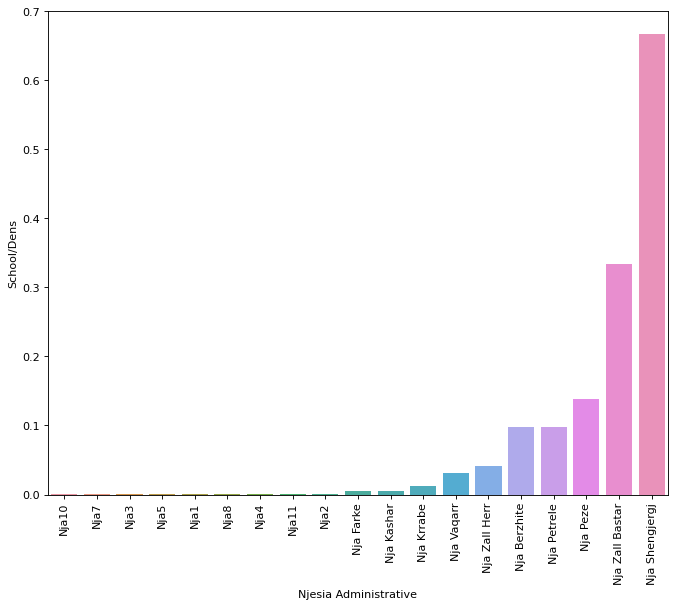

In [129]:
from matplotlib.pyplot import figure

figure(figsize=(10, 8), dpi=80)

sns.barplot(y = 'School/Dens', x = 'Njesia Administrative', data = data_adm_schools.sort_values(by = 'School/Dens'));
plt.xticks(rotation=90);

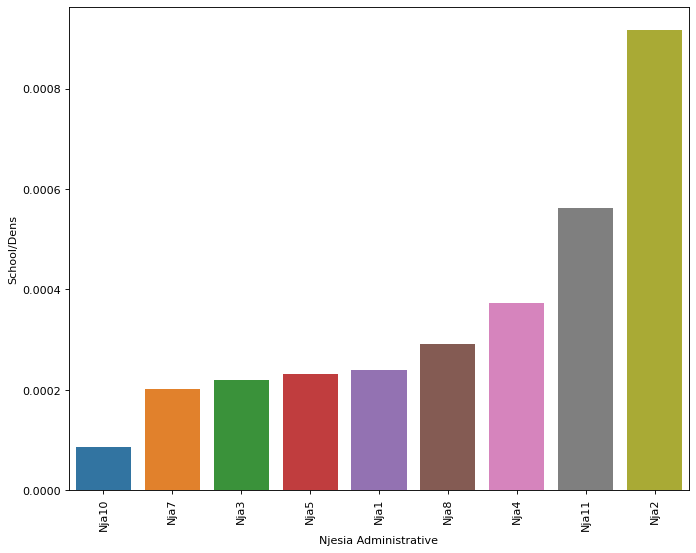

In [130]:
figure(figsize=(10, 8), dpi=80)

sns.barplot(y = 'School/Dens', x = 'Njesia Administrative', data = data_adm_schools.iloc[10:, :].sort_values(by = 'School/Dens'));
plt.xticks(rotation=90);

## Kashar, Berzhite, Farke

In [74]:
schools[schools['Njesia'] == 'Nja Kashar']

,_id,Njesia,Institucioni,Numri/Emri,Adresa
37,38,Nja Kashar,9-vjecare,100 Vjetori,Kashar
38,39,Nja Kashar,9-vjecare,Kashar,Kashar
39,40,Nja Kashar,9-vjecare,Kus,Kashar
40,41,Nja Kashar,9-vjecare,Mazrek,Kashar
41,42,Nja Kashar,9-vjecare,Mezez,Kashar
42,43,Nja Kashar,9-vjecare,Myslym Shima,"Yzberisht,Kashar"
43,44,Nja Kashar,9-vjecare,Sadik Stalioveci,Kashar
44,45,Nja Kashar,9-vjecare,Yrshek,Kashar


In [67]:
import networkx as nx
import osmnx as ox
from descartes import PolygonPatch
from shapely.geometry import Point, LineString, Polygon

/opt/anaconda3/lib/python3.9/site-packages/descartes/patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([


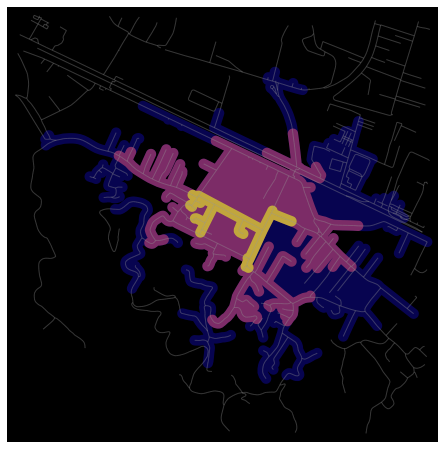

In [117]:
trip_times = [5, 10, 15] #in minutes
travel_speed = 4.5 #walking speed in km/hour


# download the street network

point = 41.352229, 19.738306
G = ox.graph_from_point(point, network_type='walk', simplify=False)

#G = ox.graph_from_address(place, network_type=network_type)

# find the centermost node and then project the graph to UTM
gdf_nodes = ox.graph_to_gdfs(G, edges=False)
x, y = gdf_nodes['geometry'].unary_union.centroid.xy
center_node = ox.distance.nearest_nodes(G, x[0], y[0])
G = ox.project_graph(G)


meters_per_minute = travel_speed * 1000 / 60 #km per hour to m per minute
for u, v, k, data in G.edges(data=True, keys=True):
    data['time'] = data['length'] / meters_per_minute
    
# get one color for each isochrone
iso_colors = ox.plot.get_colors(n=len(trip_times), cmap='plasma', start=0, return_hex=True)


def make_iso_polys(G, edge_buff=25, node_buff=50, infill=False):
    isochrone_polys = []
    for trip_time in sorted(trip_times, reverse=True):
        subgraph = nx.ego_graph(G, center_node, radius=trip_time, distance='time')

        node_points = [Point((data['x'], data['y'])) for node, data in subgraph.nodes(data=True)]
        nodes_gdf = gpd.GeoDataFrame({'id': subgraph.nodes()}, geometry=node_points)
        nodes_gdf = nodes_gdf.set_index('id')

        edge_lines = []
        for n_fr, n_to in subgraph.edges():
            f = nodes_gdf.loc[n_fr].geometry
            t = nodes_gdf.loc[n_to].geometry
            edge_lookup = G.get_edge_data(n_fr, n_to)[0].get('geometry',  LineString([f,t]))
            edge_lines.append(edge_lookup)

        n = nodes_gdf.buffer(node_buff).geometry
        e = gpd.GeoSeries(edge_lines).buffer(edge_buff).geometry
        all_gs = list(n) + list(e)
        new_iso = gpd.GeoSeries(all_gs).unary_union
        
        # try to fill in surrounded areas so shapes will appear solid and blocks without white space inside them
        if infill:
            new_iso = Polygon(new_iso.exterior)
        isochrone_polys.append(new_iso)
    return isochrone_polys

isochrone_polys = make_iso_polys(G, edge_buff=25, node_buff=0, infill=True)
fig, ax = ox.plot_graph(G, show=False, close=False, edge_color='#999999', edge_alpha=0.2,
                        node_size=0, bgcolor='k')
for polygon, fc in zip(isochrone_polys, iso_colors):
    patch = PolygonPatch(polygon, fc=fc, ec='none', alpha=0.6, zorder=-1)
    ax.add_patch(patch)
plt.show()


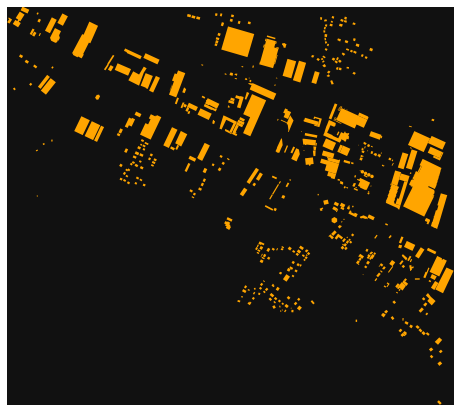

In [116]:
tags = {"building": True}
gdf = ox.geometries_from_point(point, tags)
gdf_proj = ox.project_gdf(gdf)
fig, ax = ox.plot_footprints(gdf_proj, dpi=400, save=True, show=False, close=False)
ax.scatter(41.352229, 19.738306, c='white', s=100);
plt.show()


In [107]:
areas = gdf_proj.area
areas.head()


element_type  osmid   
way           71002614     3853.156146
              71002615     1897.825497
              71002616     1159.792291
              71002617     7272.255957
              71002647    10195.485587
dtype: float64

In [108]:
tags = {"landuse": True}
gdf_total = ox.geometries_from_point(point, tags)
gdf_proj_total = ox.project_gdf(gdf_total)
fig, ax = ox.plot_footprints(gdf_proj_total, dpi=400, save=True, show=False, close=True)


<AxesSubplot:>

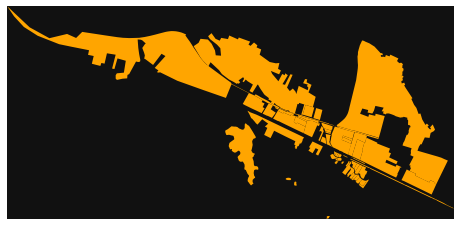

In [94]:
fig


In [89]:
sum(areas)


277301.0470539016

In [96]:
areas_t = gdf_proj_total.area
sum(areas_t)


5738102.090591148

In [97]:
sum(areas)/sum(areas_t)


0.04832626584120842

### Some metrics: 20-20 (# schools at the 20th percentile and at the 80th)

In [55]:
top20, bottom20 = population_fil_schools_dens['_id_x'].quantile([0.8, 0.2])


In [56]:
top20 / bottom20

1.6

### Gini and Thiel Indices

In [57]:
from pysal.explore import inequality

/opt/anaconda3/lib/python3.9/site-packages/spaghetti/network.py:39: FutureWarning: The next major release of pysal/spaghetti (2.0.0) will drop support for all ``libpysal.cg`` geometries. This change is a first step in refactoring ``spaghetti`` that is expected to result in dramatically reduced runtimes for network instantiation and operations. Users currently requiring network and point pattern input as ``libpysal.cg`` geometries should prepare for this simply by converting to ``shapely`` geometries.
  warnings.warn(f"{dep_msg}", FutureWarning)


In [58]:
inequality.gini.Gini(schools.groupby('Njesia', as_index = False).count()['_id'].values).g

0.2

In [59]:
inequality.theil.Theil(schools.groupby('Njesia', as_index = False).count()['_id'].values).T

0.06721983019012526

## Spatial Autocorrelation

In [60]:
# over the years

In [61]:
wq = weights.Queen.from_dataframe(population_fil_schools_dens)

In [62]:
Moran(population_fil_schools_dens['_id_x'], w=wq).I

0.18605169340463457

In [63]:
Moran(population_fil_schools_dens['_id_x'], w=wq).p_sim

0.117

In [98]:
from pysal.viz import splot
from splot.esda import plot_moran

/opt/anaconda3/lib/python3.9/site-packages/spreg/user_output.py:14: DeprecationWarning: Please use `csr_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csr` namespace is deprecated.
  from scipy.sparse.csr import csr_matrix


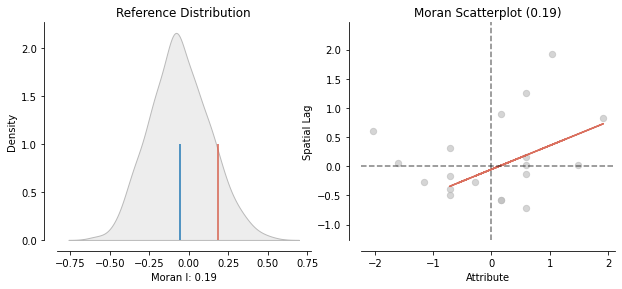

In [99]:
plot_moran(Moran(population_fil_schools_dens['_id_x'], w=wq));